In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
raw = pd.read_csv("rank_data.csv", dtype={'Score':float, 'Rate':float, 'Owners':float, 'Share' :float})
data = raw.iloc[:,1:]
print('head:',data.head(),'\nShape:',data.shape)

head:        Rate    Owners     Share      Score
0  1.313810  2.564784  0.504898  40.560954
1  1.421401  2.511269  0.894363  41.522331
2  2.068064  3.572607  0.667510  59.757502
3  1.298963  1.948049  0.054204  40.842943
4  2.071212  3.878894  2.689111  58.540345 
Shape: (305, 4)


             Rate      Owners       Share       Score
count  305.000000  305.000000  305.000000  305.000000
mean     1.955498    1.719603    0.303185   10.924524
std      0.703615    0.670310    0.469791   11.375781
min      0.000000    0.396402    0.001004    1.419507
25%      1.567565    1.248807    0.049185    3.437150
50%      2.050179    1.591001    0.151570    6.703134
75%      2.474945    1.996325    0.340279   13.241072
max      3.666608    3.878894    3.394764   59.757502
Rate      0
Owners    0
Share     0
Score     0
dtype: int64


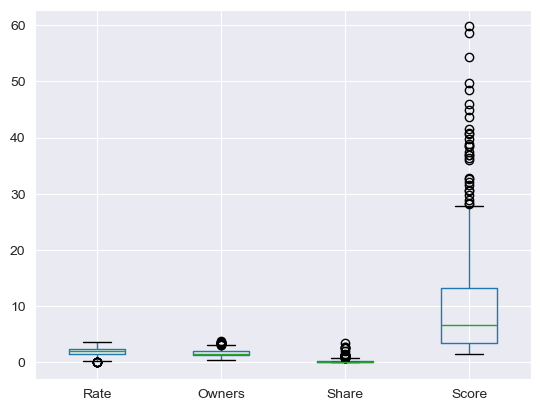

            Unnamed: 0      Rate    Owners     Share     Score
Unnamed: 0    1.000000  0.119184 -0.576338 -0.319265 -0.799978
Rate          0.119184  1.000000  0.106727  0.136804 -0.074678
Owners       -0.576338  0.106727  1.000000  0.702981  0.709303
Share        -0.319265  0.136804  0.702981  1.000000  0.446750
Score        -0.799978 -0.074678  0.709303  0.446750  1.000000


In [3]:
print(data.describe())
print(data[data.isnull()==True].count())

data.boxplot()
plt.savefig("figure/boxplot.jpg")
plt.show()
print(raw.corr())

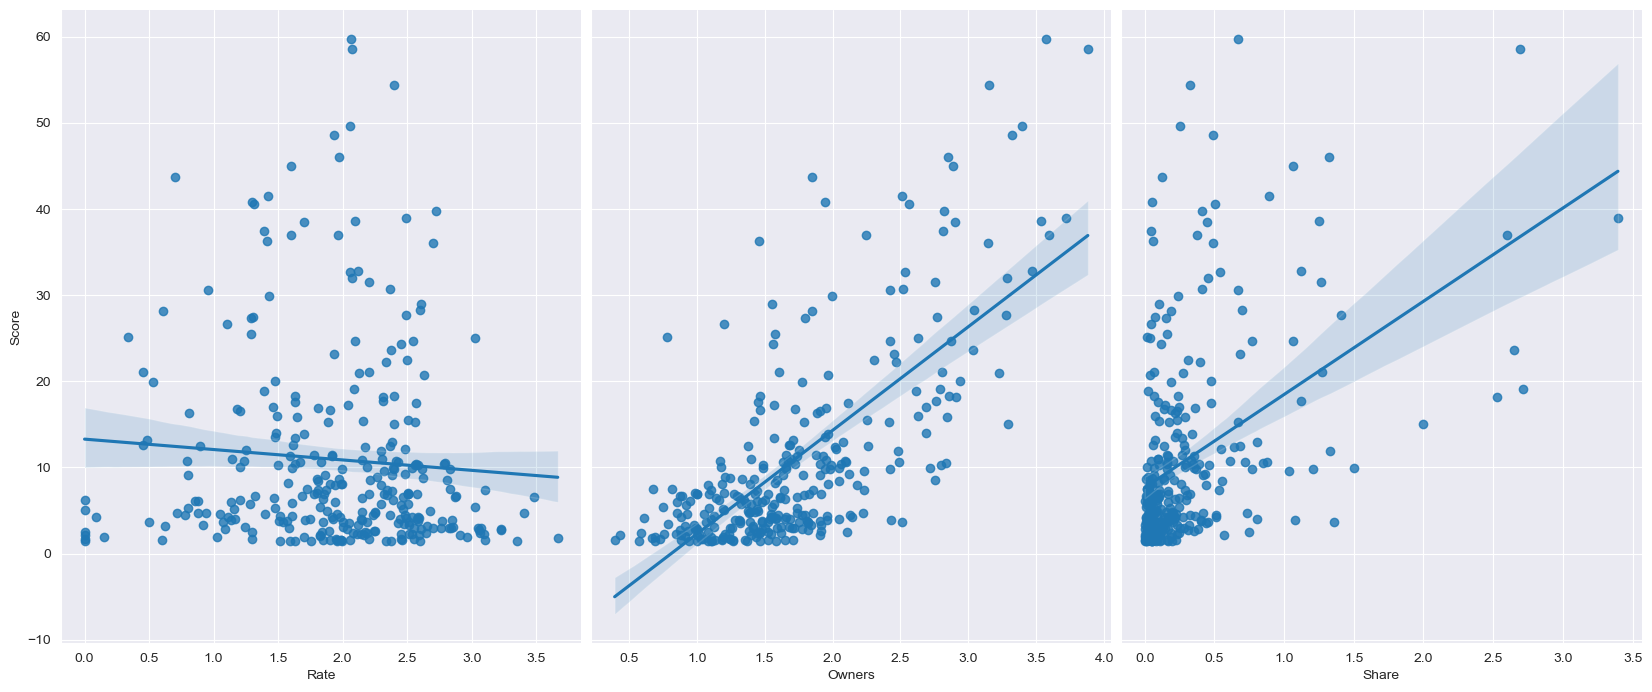

In [4]:
sns.pairplot(data, x_vars=['Rate', 'Owners', 'Share'], y_vars='Score', height=7, aspect=0.8,kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(data.iloc[:,:3],data.Score,train_size=.75)

print("Raw data features:",data.iloc[:,:3].shape,
      ",Training data features:",X_train.shape,
      ",Testing data features:",X_test.shape)

print("Raw data labels:",data.Score.shape,
      ",Training data labels:",Y_train.shape,
      ",Testing data labels:",Y_test.shape)

Raw data features: (305, 3) ,Training data features: (228, 3) ,Testing data features: (77, 3)
Raw data labels: (305,) ,Training data labels: (228,) ,Testing data labels: (77,)


In [6]:
X_train

,Rate,Owners,Share
17,0.957589,2.426487,0.666506
274,3.666608,0.671815,0.010038
11,2.395532,3.150697,0.324219
242,2.139406,1.208025,0.061230
195,0.088381,0.881917,0.010038
...,...,...,...
279,3.056390,1.822436,0.310166
118,1.232990,1.674281,0.203766
163,2.580135,2.144930,0.509917
78,2.084455,2.792134,2.715209


In [7]:
#model = Lasso(alpha=1.0)
#model = Ridge(aplha=2.5)
#model = ElasticNet(l1_ratio=0.7)

model = LinearRegression()

model.fit(X_train,Y_train)

a  = model.intercept_#Best-fit line:intercept

b = model.coef_#Regression coefficient

joblib.dump(model, "model.pkl")

print("Best-fit line:intercept",a,",Regression coefficient：",b)

Best-fit line:intercept -7.030971412364956 ,Regression coefficient： [-2.49135685 13.5299807  -1.49058958]


0.41213622139056905
[13.40472054 10.91247565  5.99230751 27.02858894  7.3270219   6.66634799
 14.76800873  6.80727914  5.96168423 12.90443133  8.36589772  8.63142141
 -4.95175294  3.20292975  7.77554887 29.00191795 10.53010388  2.9139644
  3.72097801 -1.71631504 25.2389248   9.12540533 -0.41318553  1.1065223
  8.72887748  7.39462061  4.32735548 -0.34246731  8.30518535  4.04452678
  4.3320219  16.12037069  7.8269489   6.71278107 18.84988376 -4.95724326
  8.52602395 16.0858229  13.48627007  7.7847934  12.78612295 18.64552338
 11.6270037  10.41115047 16.10188167 32.02274996  9.93769546 13.25646689
  3.43365702  7.06106259  3.95256919  2.84886216  3.73676784 14.72294579
 13.38710356  6.18743634 -0.72309786  0.09685223 33.43818267 -6.66882814
  7.81750701  1.49275232  5.48802275 15.38274907 10.7986687  11.27693183
  2.28734446  7.01545684  8.95736278 22.795783   16.12673313  8.13786249
  9.30104001 21.54378063 -3.17184961  1.98605015  8.81958604]


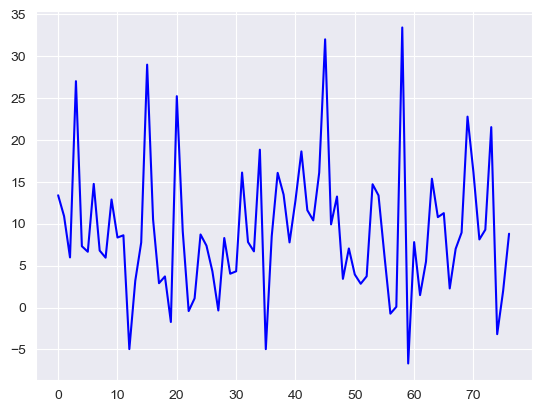

In [8]:
score = model.score(X_test,Y_test)

print(score)

Y_pred = model.predict(X_test)

print(Y_pred)

plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.savefig("figure/predict.jpg")
plt.show()

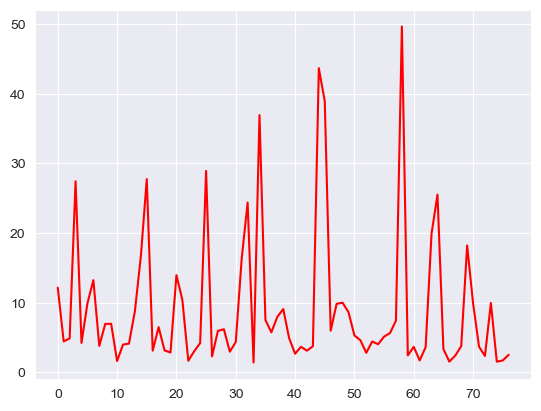

In [9]:
plt.plot(range(len(Y_test)),Y_test,'r',label="test")
plt.savefig("figure/test.jpg")
plt.show()

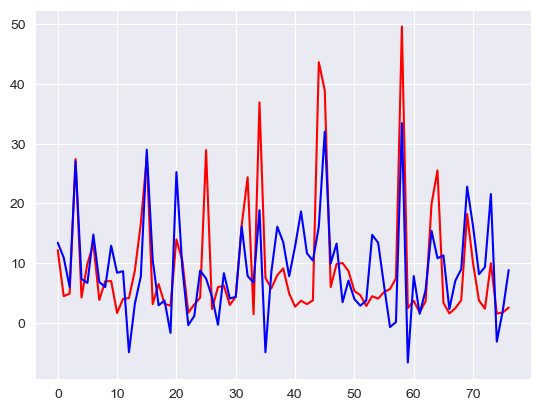

In [10]:
plt.plot(range(len(Y_test)),Y_test,'r',label="test")
plt.plot(range(len(Y_pred)), Y_pred, 'b', label="predict")
plt.savefig("figure/predict_test_compare.jpg")
plt.show()

In [11]:
raw_df = pd.read_csv("year_rank_data.csv", dtype={'Rate':float, 'Owners':float, 'Share' :float})
predict_df = raw_df
year_list = predict_df['Year']
tag_list = predict_df['Tag']

X = predict_df.drop(['Year'],axis=1)
X = X.drop(['Tag'],axis=1)
X = X.drop(['Unnamed: 0'],axis=1)
X

,Rate,Owners,Share
0,2.727806,1.744436,3.125000
1,2.727806,1.744436,3.125000
2,2.727806,1.744436,3.125000
3,2.727806,1.744436,3.125000
4,2.727806,1.744436,3.125000
...,...,...,...
6255,2.214286,0.438702,0.003011
6256,0.000000,0.396412,0.002008
6257,0.363636,0.333342,0.001004
6258,1.000000,0.333342,0.001004


In [12]:
score_list = []
to_list = model.predict(X)
for i in to_list:
      score_list.append(i)
print(score_list)

[5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 0.5709739107437724, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, 5.1171779118887475, -9.876784068519433, -9.876784068519433, -9.876784068519433, -9.876784068519433, -9.876784068519433, -9.876784068519433, -9.876784068519433, -9.876784068519433, -9.876784068519433, -9.876784068519433, -9.876784068519433, -9.876784068519433, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 4.079936118680717, 6.093274412324977,

In [13]:
raw_df['Score'] = score_list
raw_df

,Unnamed: 0,Year,Tag,Rate,Owners,Share,Score
0,0,1997,Horror,2.727806,1.744436,3.125000,5.117178
1,1,1997,Twin Stick Shooter,2.727806,1.744436,3.125000,5.117178
2,2,1997,Top-Down Shooter,2.727806,1.744436,3.125000,5.117178
3,3,1997,Villain Protagonist,2.727806,1.744436,3.125000,5.117178
4,4,1997,Difficult,2.727806,1.744436,3.125000,5.117178
...,...,...,...,...,...,...,...
6255,6255,2022,Jump Scare,2.214286,0.438702,0.003011,-6.616402
6256,6256,2022,Wrestling,0.000000,0.396412,0.002008,-1.670513
6257,6257,2022,Volleyball,0.363636,0.333342,0.001004,-3.428309
6258,6258,2022,Gaming,1.000000,0.333342,0.001004,-5.013718


In [14]:
year_all =  raw_df['Year']
raw_tag = raw_df['Tag']
tag_all = []
for i in raw_tag:
      if i not in tag_all:
            tag_all.append(i)
year = []
for i in range(26):
      x = 1997+i
      year.append(x)

arr = np.zeros((26,439))

final_df = pd.DataFrame(arr, columns=tag_all, index=year)
for index, row in raw_df.iterrows():
    year = row["Year"]
    tag = row["Tag"]
    score = row['Score']
    final_df[tag][year] = score

In [15]:
final_df.to_csv("vis5_data.csv")
final_df

,Horror,Twin Stick Shooter,Top-Down Shooter,Villain Protagonist,Difficult,Shooter,Isometric,Psychological Horror,Top-Down,Dark Humor,...,Snowboarding,Rock Music,Foreign,360 Video,Electronic,8-bit Music,Instrumental Music,Volleyball,Masterpiece,Shop Keeper
1997,5.117178,5.117178,5.117178,5.117178,5.117178,5.117178,5.117178,5.117178,5.117178,5.117178,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998,0.000000,0.000000,0.000000,0.000000,4.079936,4.079936,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1999,0.210381,0.000000,0.000000,0.000000,0.000000,8.162547,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000,0.000000,0.000000,0.000000,0.000000,0.000000,8.148239,0.000000,7.213397,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2001,0.000000,0.000000,0.000000,0.000000,7.966171,9.396612,-8.139263,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2002,0.000000,0.000000,0.000000,0.000000,-2.142040,-2.142040,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2003,0.000000,0.000000,0.000000,0.000000,4.517334,0.230558,-12.190451,-4.444646,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2004,7.372501,0.000000,0.000000,0.000000,10.711199,14.230442,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005,0.000000,0.000000,0.000000,0.000000,-3.296169,19.231296,0.040563,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006,12.244044,-1.415456,-1.415456,-5.614086,2.672332,21.303214,2.180202,-0.347128,-1.415456,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
